In [47]:
import pandas as pd
import numpy as np

df = pd.read_csv("north_merged_all.csv", index_col='time')
df.head()

,H2O_vapor_mass_ratio_surf,mean_precipitation_rate,surf_air_temp,relative_humidity,cloud_temp,H2O_vapor_mass_ratio,surf_temp,albedo_500
time,,,,,,,,
2020-01-01,3.507812,0.000,0.1625,-9999.0,-16.52500,-9999.0,-5.4000,-1.267651e+30
2020-01-02,3.652344,0.000,2.7875,-9999.0,-2.65000,-9999.0,6.2875,9.304000e-01
2020-01-03,-9999.000000,0.075,-9999.0000,-9999.0,-26.86875,-9999.0,-9999.0000,-1.267651e+30
2020-01-04,-9999.000000,0.610,-9999.0000,-9999.0,-16.27500,-9999.0,1.2250,-1.267651e+30
2020-01-05,2.351562,0.140,-1.4000,-9999.0,-12.90000,-9999.0,4.0375,-1.267651e+30


In [48]:
#transform extreme dataset into missing/null
columns = df.columns[:]

def transform_extreme(df):
    for col in columns:
        df.loc[df[col] == -9999, col] = np.nan
        if "albedo" in col.lower():
            df.loc[(df[col] < 0) | (df[col] > 1), col] = np.nan
        df.loc[(df[col] < -1e10) | (df[col] > 1e10), col] = np.nan
    return df

df = transform_extreme(df)
print(df.isnull().sum())


H2O_vapor_mass_ratio_surf     869
mean_precipitation_rate         0
surf_air_temp                 826
relative_humidity            1231
cloud_temp                    214
H2O_vapor_mass_ratio         1231
surf_temp                     473
albedo_500                   1467
dtype: int64


In [49]:
#remove entire columns with missing values greater than 1200
missing_counts = df.isnull().sum()
df = df.loc[:, missing_counts <= 1200]
df.head()



,H2O_vapor_mass_ratio_surf,mean_precipitation_rate,surf_air_temp,cloud_temp,surf_temp
time,,,,,
2020-01-01,3.507812,0.000,0.1625,-16.52500,-5.4000
2020-01-02,3.652344,0.000,2.7875,-2.65000,6.2875
2020-01-03,NaN,0.075,NaN,-26.86875,NaN
2020-01-04,NaN,0.610,NaN,-16.27500,1.2250
2020-01-05,2.351562,0.140,-1.4000,-12.90000,4.0375


In [50]:
#imputing missing values with forward/backward + interpopation
from sklearn.impute import SimpleImputer
import numpy as np

# Handle any non-numeric values first
df = df.apply(pd.to_numeric, errors='coerce')

# Forward fill missing values first
df = df.ffill()
# Then backward fill any remaining missing values
df = df.ffill()
# Use interpolation for any still remaining missing values
df = df.interpolate(method='linear', limit_direction='both')
# Final check - replace any remaining NaN with column means
df = df.fillna(df.mean())
# Verify no missing values remain
print(df.isnull().sum())
df.describe()

H2O_vapor_mass_ratio_surf    0
mean_precipitation_rate      0
surf_air_temp                0
cloud_temp                   0
surf_temp                    0
dtype: int64


,H2O_vapor_mass_ratio_surf,mean_precipitation_rate,surf_air_temp,cloud_temp,surf_temp
count,1891.000000,1891.000000,1891.000000,1891.000000,1891.000000
mean,6.888645,3.206314,11.588697,-16.868320,12.510762
std,3.879250,7.341593,9.359885,15.319634,11.736518
min,0.816406,0.000000,-11.337500,-63.306252,-19.931250
25%,3.761719,0.000000,3.537500,-27.196875,2.537500
50%,5.750000,0.085000,11.912500,-16.337500,12.600000
75%,9.839844,2.545000,19.912500,-5.962500,23.287500
max,18.390625,87.174995,29.475000,24.162500,37.349998


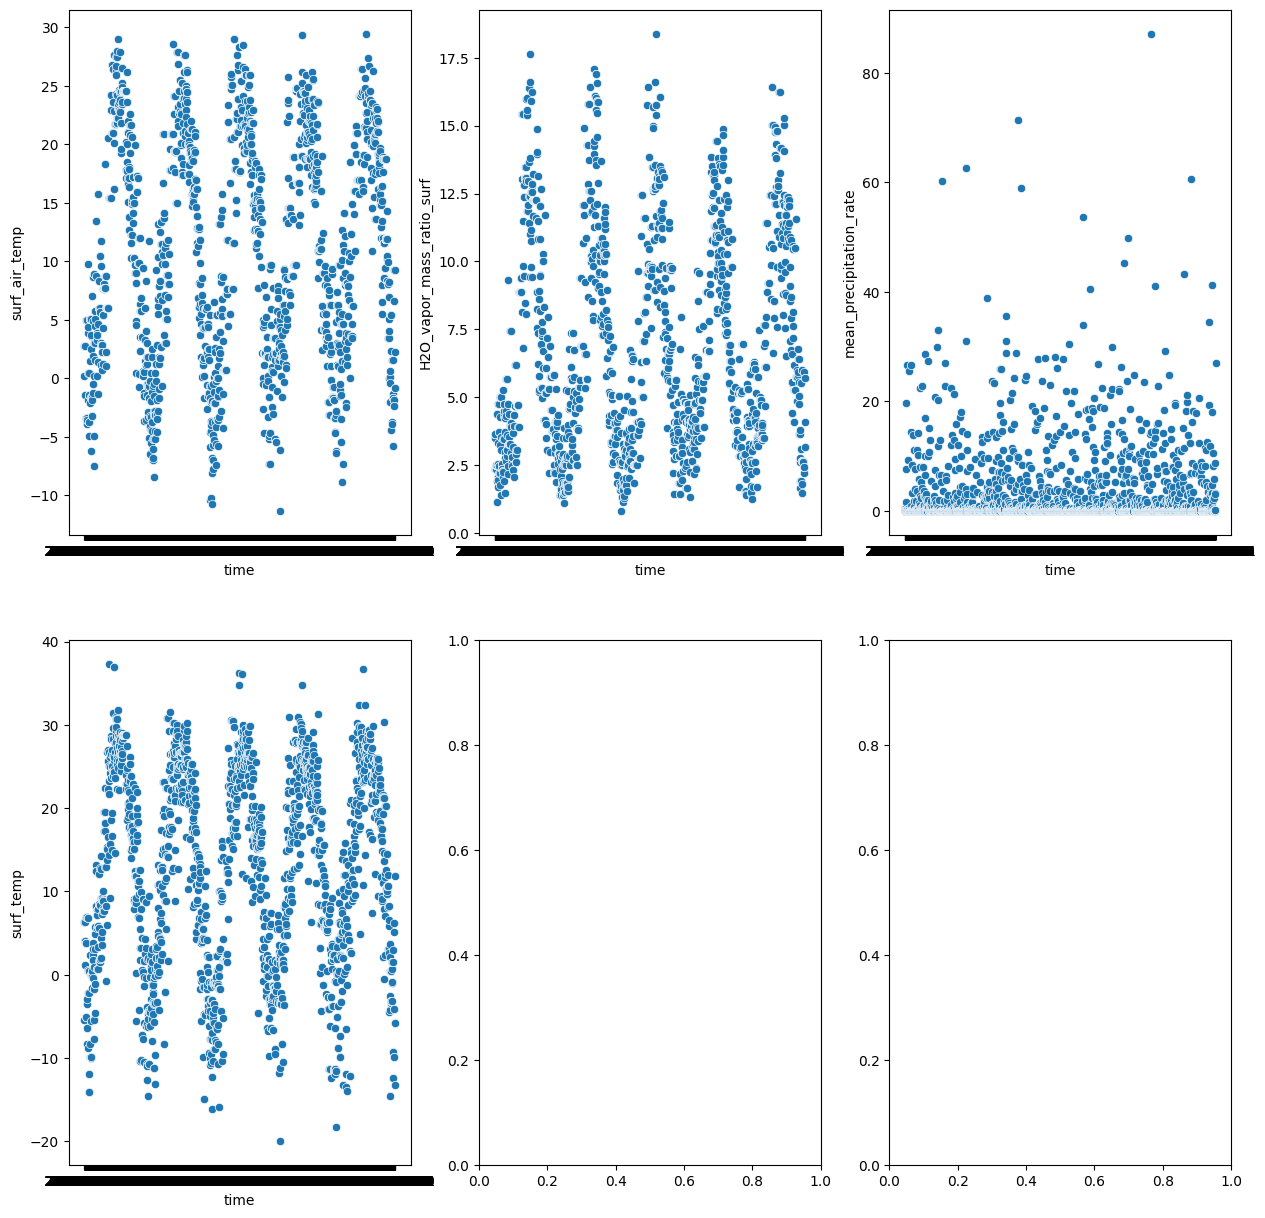

In [53]:
#visualize distribution
import matplotlib.pyplot as plt
import seaborn as sns
_, axss = plt.subplots(nrows=2, ncols=3, figsize=(15, 15))
sns.scatterplot(data=df, x="time", y="surf_air_temp", ax=axss[0, 0])
sns.scatterplot(data=df, x="time", y="H2O_vapor_mass_ratio_surf", ax=axss[0, 1])
sns.scatterplot(data=df, x="time", y="mean_precipitation_rate", ax=axss[0, 2])
sns.scatterplot(data=df, x="time", y="surf_temp", ax=axss[1, 0])

plt.show()
